## Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [44]:
data = pd.read_csv('data/Income.csv')

In [45]:
print(data.head())

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes
None


In [5]:
print(data.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


## EDA

In [6]:
correlation_matrix = data[['age', 'experience', 'income']].corr()
print(correlation_matrix)

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


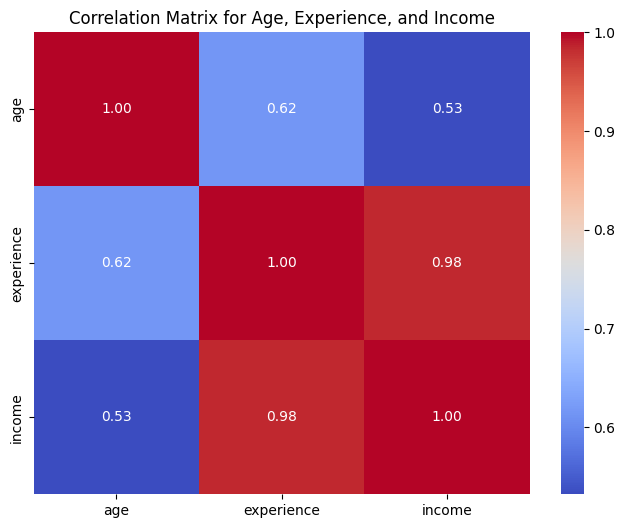

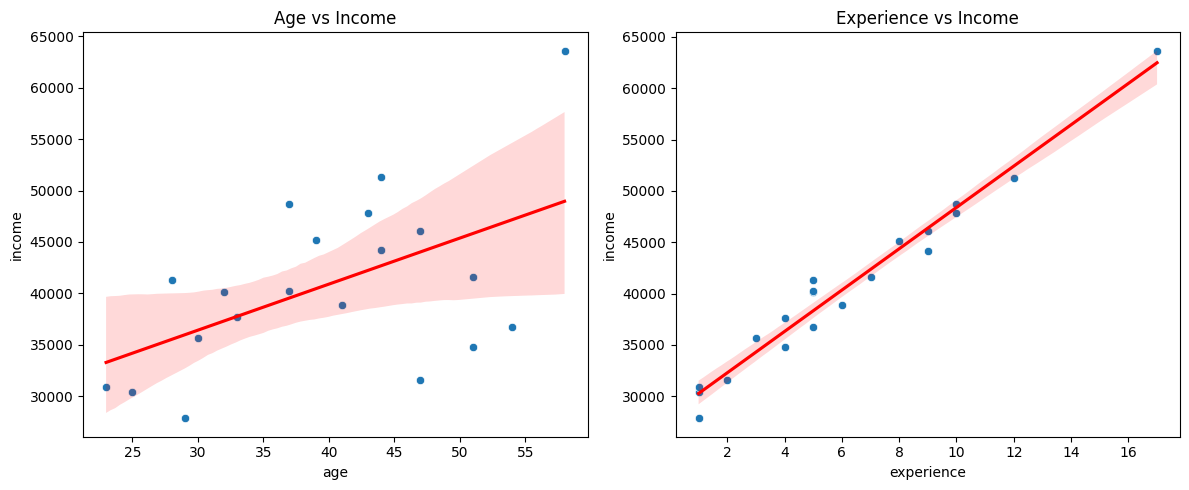

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Age, Experience, and Income")
plt.show()

# Scatter plots
plt.figure(figsize=(12, 5))

# Scatter plot for Age vs Income
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='age', y='income')
sns.regplot(data=data, x='age', y='income', scatter=False, color="red")
plt.title("Age vs Income")

# Scatter plot for Experience vs Income
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='experience', y='income')
sns.regplot(data=data, x='experience', y='income', scatter=False, color="red")
plt.title("Experience vs Income")

plt.tight_layout()
plt.show()

Analysis:

## Preprocessing

### Normalization

#### What is Normalization?

Normalization is a technique to adjust the values in a dataset within a specific range, without distorting differences in the ranges of values. Normalization is commonly used to improve model performance and training stability, especially when features in the data have varying scales.

#### Key Reasons for Normalization

1. **Improved Model Convergence**: Many algorithms, especially those based on gradient descent (e.g. linear regression), converge faster when features are on a similar scale.
2. **Enhanced Model Accuracy**: Normalization can lead to more accurate predictions, as it prevents features with larger ranges from dominating the model’s learning process.
3. **Prevents Numerical Instability**: Normalizing data can reduce the risk of large values leading to numerical instability, especially in algorithms that are sensitive to scale.

#### Common Normalization Methods

1. **Min-Max Normalization (Scaling to a Range)**:
   - Formula: $X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$
   - Scales features to a fixed range, typically $[0, 1]$ or $[-1, 1]$.
   - Useful when the data has known minimum and maximum values.

2. **Decimal Scaling**:
   - Formula: $X_{\text{norm}} = \frac{X}{10^j}$, where $j$ is the smallest integer such that all normalized values are within the range $[-1, 1]$.
   - Useful for normalizing data with values varying in orders of magnitude.

#### When to Normalize?

Normalization is typically applied when:
- Features in the data have varying ranges.
- Using machine learning algorithms sensitive to the scale of data (e.g., neural networks, SVMs).
- Data will be fed into distance-based algorithms (e.g., k-nearest neighbors, K-means clustering), where differences in scales can affect distance calculations.

### Standardization

#### What is Standardization?

Standardization is a data preprocessing technique that transforms features to have a mean of 0 and a standard deviation of 1. This process is particularly useful when features have different units or scales, as it helps normalize their influence on machine learning models.

#### Key Reasons for Standardization?

1. **Consistency in Scale**: When features have different ranges or units, standardization makes them comparable. For instance, if we have features like `age` (in years) and `income` (in thousands), standardizing brings both to a common scale.
2. **Improved Model Performance**: Many machine learning algorithms, especially those that assume normally distributed data (e.g., linear regression and logistic regression), perform better with standardized features.
3. **Faster Convergence**: Standardized data can improve convergence rates in algorithms that use gradient descent (e.g., neural networks), as it prevents some features from dominating the model's learning.

#### Standardization Formula

The formula for standardization of a feature $X$ is:

$$X_{\text{standard}} = \frac{X - \mu}{\sigma}$$

Where:
- $X$ is the original feature value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

After standardization:
- The mean of the transformed feature becomes 0.
- The standard deviation becomes 1.

#### When to Use Standardization?

Standardization is often applied when:
- Working with algorithms that assume normally distributed data (e.g., linear models, k-means clustering, and PCA).
- Features in dataset have varying scales and units.
- Using algorithms sensitive to feature scale and distance calculations (e.g., k-nearest neighbors, support vector machines).

### Implementation

#### Standardization vs. Normalization

- **Standardization** scales data to have a mean of 0 and a standard deviation of 1, focusing on distribution shape.
- **Normalization** scales data to a specific range, typically [0, 1], emphasizing bounded values.

Standardization is generally more robust than normalization when dealing with outliers and is often preferred for algorithms that assume data is Gaussian.

In [8]:
# Min-Max Scaling
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

# Z-score scaling
def standardize(df):
    return (df - df.mean()) / df.std()

normalized_data = normalize(data)
standardized_data = standardize(data)

In [9]:
X_normalized = normalized_data[['age', 'experience']].values  # 2 Features
y_normalized = normalized_data['income'].values  # Target

X_standardized = standardized_data[['age', 'experience']].values  # 2 Features
y_standardized = standardized_data['income'].values  # Target

X = data[['age', 'experience']].values  # 2 Features
y = data['income'].values  # Target

In [10]:
def plot_line(line, X, y):
    # Linear regression coefficients
    coefficients = line

    # Prepare the mesh grid for plotting
    age_range = np.linspace(X.T[0].min(), X.T[0].max(), 100)  # First column for age
    experience_range = np.linspace(X.T[1].min(), X.T[1].max(), 100)  # Second column for experience
    age_mesh, experience_mesh = np.meshgrid(age_range, experience_range)

    # Calculate the predicted income using the regression coefficients
    predicted_income = (coefficients[0] * age_mesh + coefficients[1] * experience_mesh)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plotting the original normalized data points
    plt.scatter(X.T[0], X.T[1], c=y, cmap='viridis', label='Data points', edgecolor='k')

    # Plotting the regression surface
    plt.contourf(age_mesh, experience_mesh, predicted_income, alpha=0.5, levels=50, cmap='viridis')

    plt.colorbar(label='Predicted Income')
    plt.xlabel('Normalized Age')
    plt.ylabel('Normalized Experience')
    plt.title('Linear Regression: Predicted Income based on Normalized Age and Experience')
    plt.legend()
    plt.show()

In [24]:
def print_MSE_and_line(X, y, weights):
    # Predictions and MSE for Gradient Descent model
    y_pred_gd = X.dot(weights)
    mse_gd = np.mean((y - y_pred_gd) ** 2)
    print("Gradient Descent MSE:", mse_gd)
    print("Gradient Descent Line:", weights)

## Gradient Descent

In [12]:
# Gradient Descent Parameters
learning_rate = 0.01
iterations = 1000
m = y.size  # Number of data points

In [13]:
# Gradient Descent function
def gradient_descent(X, y, weights, learning_rate, iterations):
    for i in range(iterations):
        # Calculate predictions
        predictions = X.dot(weights)

        # print(predictions)
        error = predictions - y

        # print(error)
        gradient = (1/m) * X.T.dot(error)

        # print(gradient)
        weights -= learning_rate * gradient
    
    return weights

In [14]:
# Initialize weights
weights_gd_normalized = np.random.randn(X.shape[1]) # Number of features
weights_gd_standardized = np.random.randn(X.shape[1]) # Number of features

In [15]:
# Train the model using gradient descent
weights_gd_normalized = gradient_descent(X_normalized, y_normalized, weights_gd_normalized, learning_rate, iterations=500)
weights_gd_standardized = gradient_descent(X_standardized, y_standardized, weights_gd_standardized, learning_rate, iterations=500)

In [25]:
print_MSE_and_line(X_normalized, y_normalized, weights_gd_normalized)

Gradient Descent MSE: 0.006580954215927842
Gradient Descent Line: [-0.05329696  0.9648178 ]


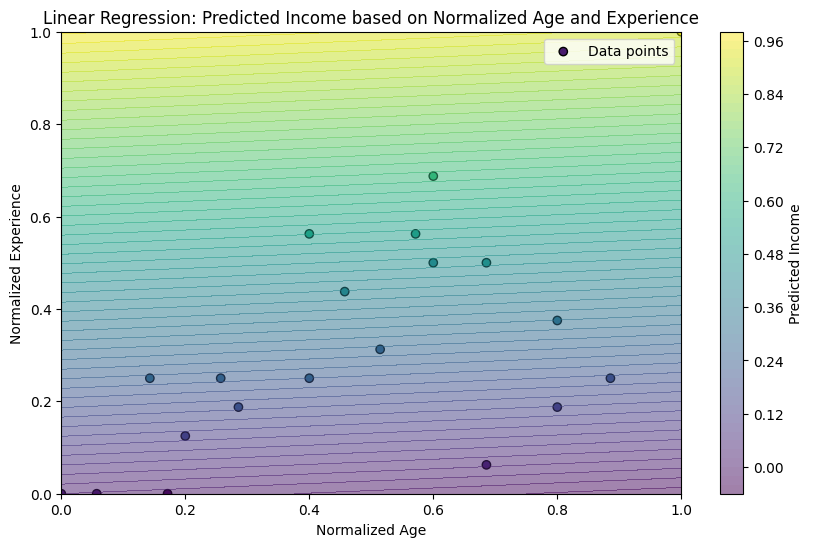

In [26]:
plot_line(weights_gd_normalized, X_normalized, y_normalized)

In [27]:
print_MSE_and_line(X_standardized, y_standardized, weights_gd_standardized)

Gradient Descent MSE: 0.036686532156504005
Gradient Descent Line: [0.02596943 0.91261513]


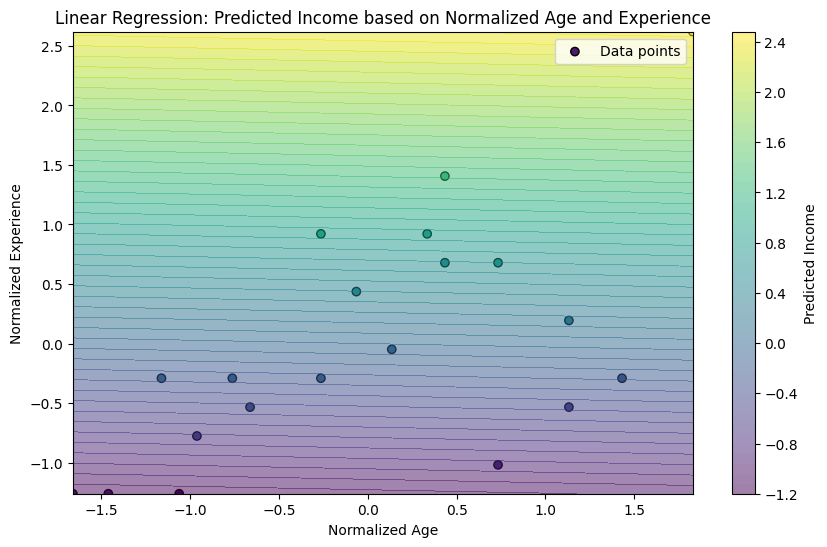

In [28]:
plot_line(weights_gd_standardized, X_standardized, y_standardized)

## Normal Equation

We can calculate the weights directly:

$$\text{weights} = (X^T X)^{-1} X^T y$$

In [29]:
# Normal Equation
weights_ne_normalized = np.linalg.inv(X_normalized.T.dot(X_normalized)).dot(X_normalized.T).dot(y_normalized)
weights_ne_standardized = np.linalg.inv(X_standardized.T.dot(X_standardized)).dot(X_standardized.T).dot(y_standardized)

In [31]:
print_MSE_and_line(X_normalized, y_normalized, weights_ne_normalized)

Gradient Descent MSE: 0.0033321430216135726
Gradient Descent Line: [0.02369324 1.00383726]


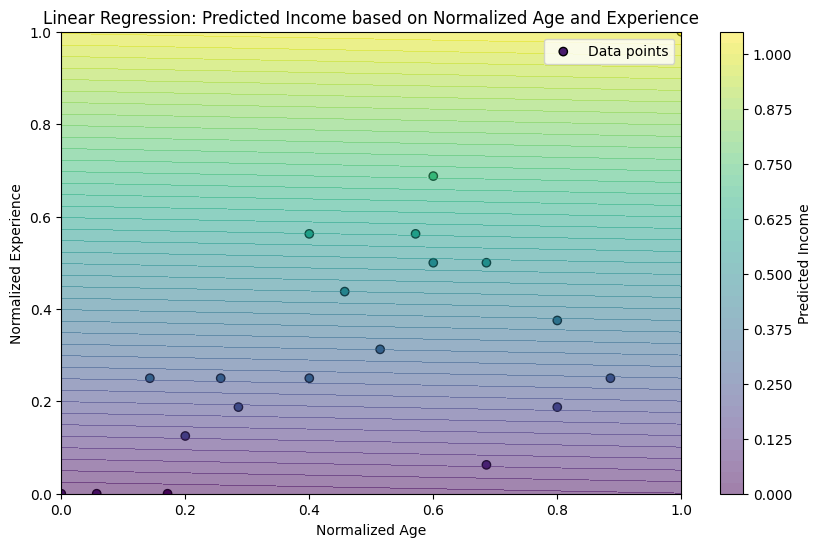

In [32]:
plot_line(weights_ne_normalized, X_normalized, y_normalized)

In [34]:
print_MSE_and_line(X_standardized, y_standardized, weights_ne_standardized)

Gradient Descent MSE: 0.021530675532824294
Gradient Descent Line: [-0.11785872  1.05672922]


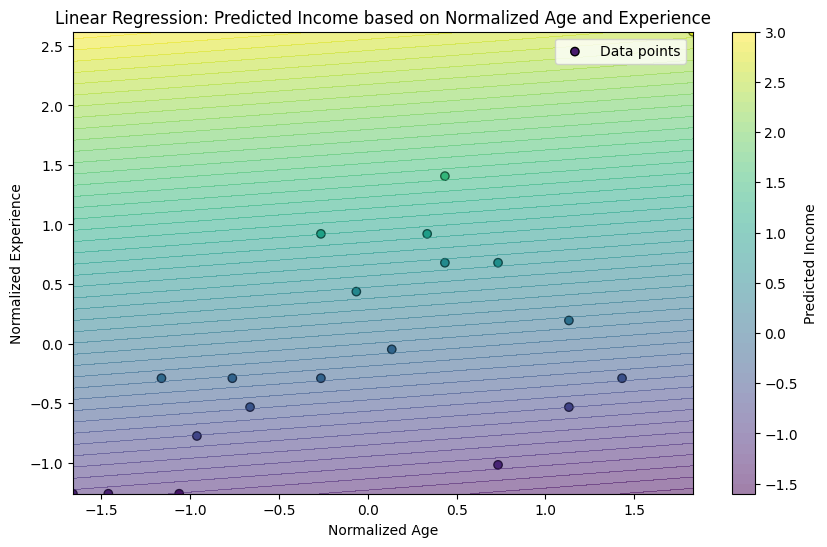

In [35]:
plot_line(weights_ne_standardized, X_standardized, y_standardized)

## Comparison

### Normalization vs. Standardization

In [39]:
print_MSE_and_line(X_normalized, y_normalized, weights_gd_normalized)
print("-------")
print_MSE_and_line(X_standardized, y_standardized, weights_gd_standardized)

Gradient Descent MSE: 0.006580954215927842
Gradient Descent Line: [-0.05329696  0.9648178 ]
-------
Gradient Descent MSE: 0.036686532156504005
Gradient Descent Line: [0.02596943 0.91261513]


In [40]:
print_MSE_and_line(X_normalized, y_normalized, weights_ne_normalized)
print("-------")
print_MSE_and_line(X_standardized, y_standardized, weights_ne_standardized)

Gradient Descent MSE: 0.0033321430216135726
Gradient Descent Line: [0.02369324 1.00383726]
-------
Gradient Descent MSE: 0.021530675532824294
Gradient Descent Line: [-0.11785872  1.05672922]


Analysis:

### Gradient Descent vs. Normal Equation

In [42]:
print_MSE_and_line(X_normalized, y_normalized, weights_gd_normalized)
print("-------")
print_MSE_and_line(X_normalized, y_normalized, weights_ne_normalized)

Gradient Descent MSE: 0.006580954215927842
Gradient Descent Line: [-0.05329696  0.9648178 ]
-------
Gradient Descent MSE: 0.0033321430216135726
Gradient Descent Line: [0.02369324 1.00383726]


In [41]:
print_MSE_and_line(X_standardized, y_standardized, weights_gd_standardized)
print("-------")
print_MSE_and_line(X_standardized, y_standardized, weights_ne_standardized)

Gradient Descent MSE: 0.036686532156504005
Gradient Descent Line: [0.02596943 0.91261513]
-------
Gradient Descent MSE: 0.021530675532824294
Gradient Descent Line: [-0.11785872  1.05672922]


Analysis: